In [23]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import mltools.logistic2 as lc2

# Load and preprocess the data
iris = np.genfromtxt("iris.txt", delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]
X, _ = ml.rescale(X)
XA, YA = X[Y<2,:], Y[Y<2]
XB, YB = X[Y>0,:], Y[Y>0]

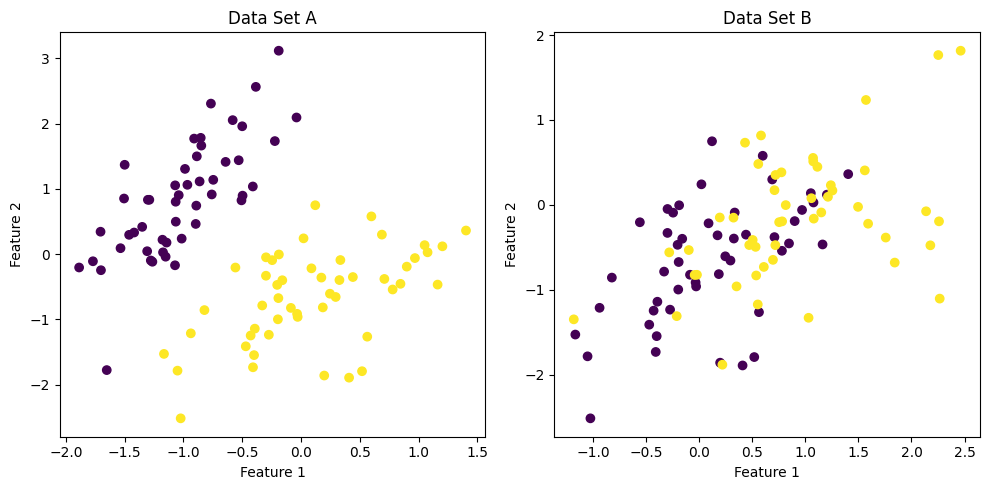

In [24]:
# (a) Scatter plot to visualize the two classes
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(XA[:,0], XA[:,1], c=YA, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Set A')

plt.subplot(122)
plt.scatter(XB[:,0], XB[:,1], c=YB, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Set B')

plt.tight_layout()
plt.show()

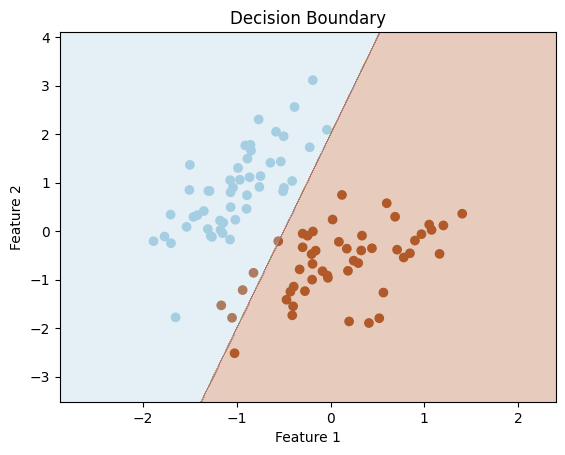

In [26]:
# (b)
def plotBoundary(learner, X, Y):
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    def decision_boundary(x):
        return np.sign(0.5 + 1 * x[0] - 0.25 * x[1])
    h = 0.01 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([decision_boundary(point) for point in grid_points])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

import mltools.logistic2 as lc2
learner = lc2.logisticClassify2()
learner.classes = np.unique(YA)
wts = [0.5, 1, -0.25] 
learner.theta = wts
plotBoundary(learner, XA, YA)

In [29]:
class Learner:
    def __init__(self, theta, classes):
        self.theta = theta
        self.classes = classes
    
    def predict(self, X):
        return np.where(self.theta[0] + self.theta[1]*X[:,0] + self.theta[2]*X[:,1] >= 0, self.classes[1], self.classes[0])

# 创建Learner对象
learner = Learner(theta=[0.5, -0.3, 0.1], classes=[0, 1])

# 定义训练数据和标签
XA = np.array([[1, 2], [1, 3], [0, -1], [-1, 0]])
YA = np.array([0, 0, 1, 1])

# 定义测试数据和标签
XB = np.array([[2, -1], [0, 0], [1, 1]])
YB = np.array([1, 0, 1])

# 调用预测方法进行预测
predicted_A = learner.predict(XA)
error_rate_A = np.mean(predicted_A != YA)
print(f"Error rate on Data Set A: {error_rate_A:.4f}")

predicted_B = learner.predict(XB)
error_rate_B = np.mean(predicted_B != YB)
print(f"Error rate on Data Set B: {error_rate_B:.4f}")

Error rate on Data Set A: 0.5000
Error rate on Data Set B: 0.6667


TypeError: list indices must be integers or slices, not tuple

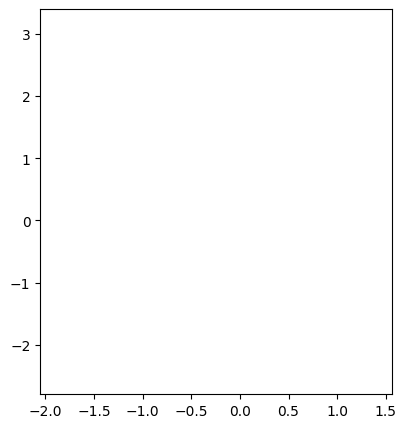

In [28]:
#D
plt.figure(figsize=(10,5))
plt.subplot(121)
ml.plotClassify2D(learner, XA, YA)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Data Set A')

plt.subplot(122)
ml.plotClassify2D(learner, XB, YB)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary for Data Set B')

plt.tight_layout()
plt.show()

In [18]:
print(XA.shape)
print(XB.shape)

(4, 2)
(3, 2)


In [19]:
def gradient(self, X, Y):
    """
    Calculate the gradient of the logistic loss for a single data point.

    Parameters:
    X (array-like): Data point features.
    Y (int): True class label (0 or 1).

    Returns:
    grad (array-like): Gradient of the logistic loss.
    """
    if self.theta is None:
        raise Exception("Model not trained yet. Set the model parameters using train function.")

    # Calculate the linear response
    z = np.dot(X, self.theta)

    # Calculate the gradient
    grad = (1 / (1 + np.exp(-z)) - Y) * X

    return grad


In [20]:
def train(self, X, Y, step_size=0.01, max_iter=100, stop_tol=1e-6):
    """
    Train the logistic classifier using stochastic gradient descent.

    Parameters:
    X (array-like): Data points.
    Y (array-like): True class labels (0 or 1).
    step_size (float): Learning rate for gradient descent.
    max_iter (int): Maximum number of iterations.
    stop_tol (float): Stopping tolerance based on loss change.

    Returns:
    None
    """
    if self.theta is None:
        self.theta = np.zeros(X.shape[1])  # Initialize weights if not set

    prev_loss = float('inf')

    for iteration in range(max_iter):
        for i in range(X.shape[0]):
            xi = X[i]
            yi = Y[i]
            grad = self.gradient(xi, yi)
            self.theta -= step_size * grad

        loss = self.loss(X, Y)
        if abs(prev_loss - loss) < stop_tol:
            break

        prev_loss = loss

In [21]:
# Create a logistic classifier and set weights
learnerA = lc2.logisticClassify2()
learnerA.classes = np.unique(YA)
wtsA = [0.5, 1, -0.25]  # Replace with appropriate values
learnerA.theta = wtsA

learnerB = lc2.logisticClassify2()
learnerB.classes = np.unique(YB)
wtsB = [0.5, 1, -0.25]  # Replace with appropriate values
learnerB.theta = wtsB


In [22]:
# Train the classifiers
learnerA.train(XA, YA)
learnerB.train(XB, YB)


AttributeError: 'logisticClassify2' object has no attribute 'plotFlag'